### 📩**Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Models**

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 📥**Loading Dataset**

In [3]:
patient_df = pd.read_csv("D:\\Predictive Pulse\\Data Set\\patient_data.csv")

In [4]:
patient_df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [5]:
patient_df.head(10)

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
5,Female,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
6,Male,65+,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
7,Female,65+,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
8,Male,18-34,Yes,No,No,Sever,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
9,Male,35-50,Yes,Yes,Yes,Sever,Yes,Yes,No,<1 Year,121- 130,91 - 100,Yes,HYPERTENSION (Stage-2)


In [6]:
patient_df.sample(5)

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
173,Female,18-34,Yes,No,No,Sever,No,Yes,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
800,Female,35-50,Yes,Yes,Yes,Sever,No,Yes,No,1 - 5 Years,121- 130,91 - 100,Yes,HYPERTENSION (Stage-2)
1236,Female,18-34,Yes,Yes,Yes,Moderate,Yes,Yes,Yes,1 - 5 Years,121 - 130,91 - 100,Yes,HYPERTENSION (Stage-2)
721,Female,35-50,Yes,No,Yes,Mild,No,No,No,1 - 5 Years,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
838,Male,65+,Yes,No,Yes,Mild,No,No,No,1 - 5 Years,121- 130,91 - 100,No,HYPERTENSION (Stage-1)


### 📃**Data Summary**
The dataset contains information on patients with hypertension, detailing their demographic and medical history. It includes columns for gender, age group, history of hypertension, medication intake, severity of condition, symptoms like breath shortness and visual changes, nose bleeding, duration since diagnosis, blood pressure readings (systolic and diastolic), controlled diet status, and the stage of hypertension. Most patients in the sample have mild hypertension (Stage 1) and are not on medication or a controlled diet. The age groups span from 18-34 to 51-64, with both males and females represented.

### **Columns**
- C -> Gender.      **[CATEGORICAL]**
- Age -> Age group of the patients.     **[NUMERICAL]**
- Patient -> whether they were taking medical care or not.      **[CATEGORICAL]**
- TakeMedication -> whether they were taking any medicine or not.       **[CATEGORICAL]**
- Severity -> states the severity of the condition.     **[CATEGORICAL]**
- BreathShortness -> do they feel loss of breathe.      **[CATEGORICAL]**
- VisualChanges -> is there any visual changes in appearance.       **[CATEGORICAL]**
- NoseBleeding -> are there incidents of nose bleeding.     **[CATEGORICAL]**
- Whendiagnoused -> how long before they were diagnosed.        **[CATEGORICAL]**
- Systolic -> Systolic blood pressure (the top number) measures the force when your heart beats and pumps blood.        **[NUMERICAL]**
- Diastolic	-> Diastolic blood pressure (the bottom number) gauges the pressure when your heart rests between beats.        **[NUMERICAL]**
- ControlledDiet -> are they controlling diet or not.       **[CATEGORICAL]**
- Stages -> at what stage of hypertension they are currently.       **[CATEGORICAL]**


### **Problems with data**
#### **Dirty Data**
- C column should be named Gender. [**Consistency Issue**] ✅
- Whendiagnoused column data is written in unreadable format, change it to readable format. [**Consistency Issue**] ✅
- Stages column has inaccurate value 'HYPERTENSIVE CRISI'. [**Consistency Issue**] ✅
#### **Messy Data**
- Age column has groups of age-numbers, should be converted into categories. [**Consistency Issue**] ✅
- Systolic column has groups, should be converted into categories. [**Consistency Issue**] ✅
- Diastolic column has groups, should be converted into categories. [**Consistency Issue**] ✅
- TakeMedication column has yes value 2 times "Yes " and "Yes" [**Consistency Issue**] ✅
- NoseBleeding column has no value 2 times "No " and "No" [**Consistency Issue**] ✅
- Systolic column has '120 - 130' value 2 times "120- 130" and "120 - 130" [**Consistency Issue**] ✅
- Stages column has HYPERTENSION (Stage-2) value 2 times "HYPERTENSION (Stage-2)" and "HYPERTENSION (Stage-2).". [**Consistency Issue**] ✅

In [7]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C                1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [8]:
patient_df.describe()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,6
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


In [9]:
patient_df.isnull().value_counts()

C      Age    History  Patient  TakeMedication  Severity  BreathShortness  VisualChanges  NoseBleeding  Whendiagnoused  Systolic  Diastolic  ControlledDiet  Stages
False  False  False    False    False           False     False            False          False         False           False     False      False           False     1825
Name: count, dtype: int64

### **Data Pre-processing**

##### Solution - Changing the column name from C to Gender

In [10]:
# Code
patient_df.rename(columns={"C": "Gender", "Whendiagnoused": "Whendiagnosed"}, inplace=True)

In [11]:
# Test
patient_df.sample()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnosed,Systolic,Diastolic,ControlledDiet,Stages
551,Male,18-34,Yes,Yes,Yes,Moderate,Yes,Yes,Yes,1 - 5 Years,121- 130,100+,Yes,HYPERTENSIVE CRISIS


In [12]:
col_lst = ["Gender","Age","History","Patient","TakeMedication","Severity","BreathShortness",
        "VisualChanges","NoseBleeding","Whendiagnosed","Systolic","Diastolic","ControlledDiet","Stages"]
for col in col_lst:
    print(f"{col} -> {patient_df[col].unique()}")

Gender -> ['Male' 'Female']
Age -> ['18-34' '35-50' '51-64' '65+']
History -> ['Yes' 'No']
Patient -> ['No' 'Yes']
TakeMedication -> ['No' 'Yes ' 'Yes']
Severity -> ['Mild' 'Sever' 'Moderate']
BreathShortness -> ['No' 'Yes']
VisualChanges -> ['No' 'Yes']
NoseBleeding -> ['No ' 'No' 'Yes']
Whendiagnosed -> ['<1 Year' '1 - 5 Years' '>5 Years']
Systolic -> ['111 - 120' '121- 130' '130+' '100+' '121 - 130']
Diastolic -> ['81 - 90' '91 - 100' '100+' '130+' '70 - 80']
ControlledDiet -> ['No' 'Yes']
Stages -> ['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


#### Replacing Values
- Replaceing "Yes " to "Yes" in TakeMedication
- Replaceing "No " to "No" in NoseBleeding
- Replaceing "121- 130" to "121 - 130" in Systolic
- Replaceing "HYPERTENSIVE CRISI" to "HYPERTENSIVE CRISIS" and "HYPERTENSION (Stage-2)." to "HYPERTENSION (Stage-2)" in Stages

In [13]:
# Code
patient_df["TakeMedication"].replace("Yes ", "Yes", inplace=True)
patient_df["NoseBleeding"].replace("No ", "No", inplace=True)
patient_df["Systolic"].replace("121- 130", "121 - 130", inplace=True)
patient_df["Stages"].replace({"HYPERTENSIVE CRISI": "HYPERTENSIVE CRISIS", "HYPERTENSION (Stage-2).": "HYPERTENSION (Stage-2)"}, inplace=True)

In [14]:
# Test
print(patient_df["TakeMedication"].unique())
print(patient_df["NoseBleeding"].unique())
print(patient_df["Systolic"].unique())
print(patient_df["Stages"].unique())

['No' 'Yes']
['No' 'Yes']
['111 - 120' '121 - 130' '130+' '100+']
['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'NORMAL']


#### Changing datatype from object to category

In [15]:
# Code
for col in patient_df.columns:
    patient_df[col] = patient_df[col].astype("category")

In [16]:

patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           1825 non-null   category
 1   Age              1825 non-null   category
 2   History          1825 non-null   category
 3   Patient          1825 non-null   category
 4   TakeMedication   1825 non-null   category
 5   Severity         1825 non-null   category
 6   BreathShortness  1825 non-null   category
 7   VisualChanges    1825 non-null   category
 8   NoseBleeding     1825 non-null   category
 9   Whendiagnosed    1825 non-null   category
 10  Systolic         1825 non-null   category
 11  Diastolic        1825 non-null   category
 12  ControlledDiet   1825 non-null   category
 13  Stages           1825 non-null   category
dtypes: category(14)
memory usage: 27.1 KB


### **Exploratory Data Analysis**

- C -> Gender **[CATEGORICAL]**
- Age -> Age group of the patients. **[NUMERICAL]**
- Patient -> whether they were taking medical care or not. **[CATEGORICAL]**
- TakeMedication -> whether they were taking any medicine or not. **[CATEGORICAL]**
- Severity -> states the severity of the condition. **[CATEGORICAL]**
- BreathShortness -> do they feel loss of breathe.**[CATEGORICAL]**
- VisualChanges -> is there any visual changes in appearance.  **[CATEGORICAL]**
- NoseBleeding -> are there incidents of nose bleeding.**[CATEGORICAL]**
- Whendiagnosed -> how long before they were diagnosed. **[CATEGORICAL]**
- Systolic -> Systolic blood pressure (the top number) measures the force when your heart beats and pumps blood.**[NUMERICAL]**
- Diastolic	-> Diastolic blood pressure (the bottom number) gauges the pressure when your heart rests between beats. **[NUMERICAL]**
- ControlledDiet -> are they controlling diet or not.**[CATEGORICAL]**
- Stages -> at what stage of hypertension they are currently. **[CATEGORICAL]**

#### **Univariate Analysis**

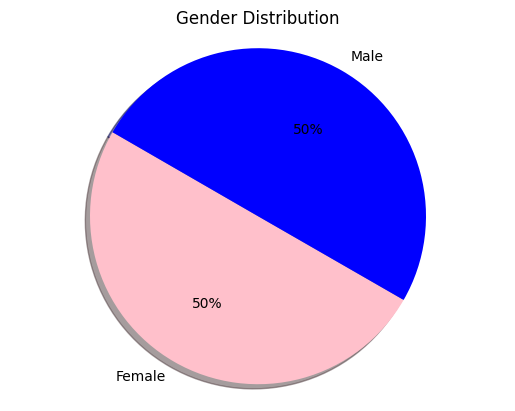

In [17]:
genderCount = patient_df["Gender"].value_counts()
plt.pie(genderCount, labels=genderCount.index, autopct="%1.0f%%", startangle=150, shadow=True, colors=['pink', 'blue'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Number of pateint at each stage')

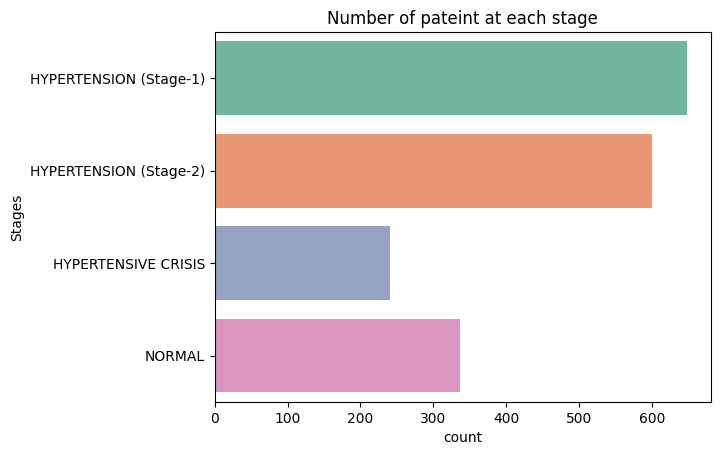

In [18]:
ax = sns.countplot(data = patient_df, y = "Stages", palette="Set2")
plt.title("Number of pateint at each stage")

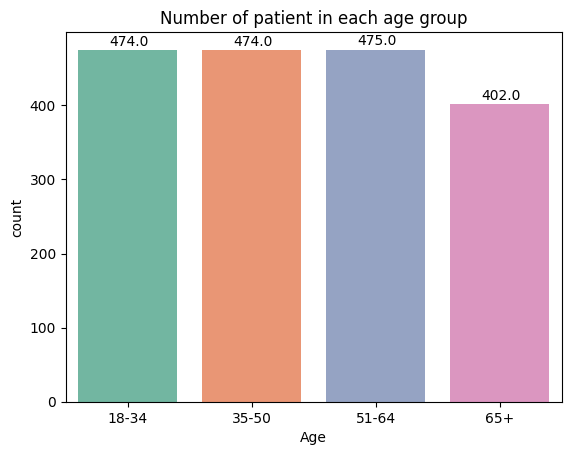

In [19]:
ax = sns.countplot(data = patient_df, x = "Age", palette="Set2")
plt.title("Number of patient in each age group")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+6))
plt.show()

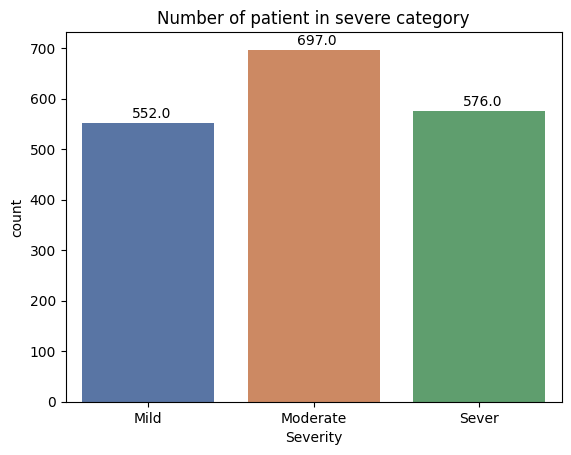

In [20]:
ax = sns.countplot(data=patient_df, x="Severity", palette="deep")
plt.title("Number of patient in severe category")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
plt.show()

#### **Bivariate Analysis**

In [21]:
pd.crosstab(patient_df["Stages"],patient_df["Systolic"])

Systolic,100+,111 - 120,121 - 130,130+
Stages,,,,
HYPERTENSION (Stage-1),0,456,120,72
HYPERTENSION (Stage-2),4,168,408,20
HYPERTENSIVE CRISIS,0,48,49,144
NORMAL,0,336,0,0


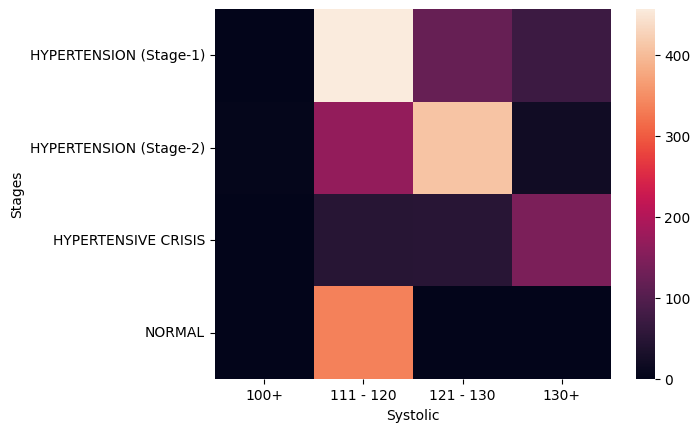

In [22]:
sns.heatmap(data=pd.crosstab(patient_df["Stages"], patient_df["Systolic"]), cbar=True)
plt.show()


In [23]:
pd.crosstab(patient_df["Stages"], patient_df["Diastolic"])

Diastolic,100+,130+,70 - 80,81 - 90,91 - 100
Stages,,,,,
HYPERTENSION (Stage-1),72,0,0,456,120
HYPERTENSION (Stage-2),20,4,0,204,372
HYPERTENSIVE CRISIS,145,0,0,48,48
NORMAL,0,0,336,0,0


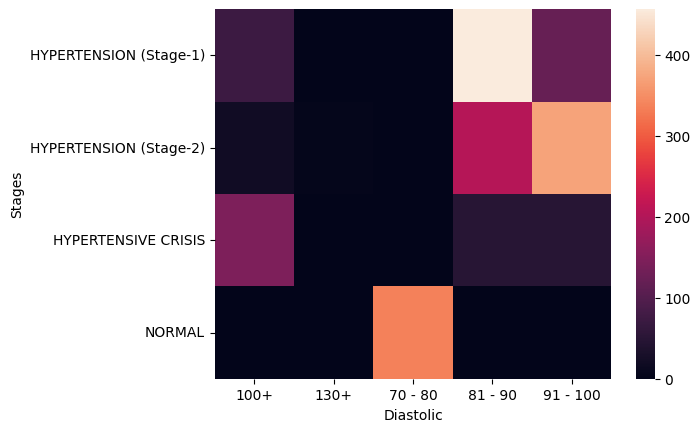

In [24]:
sns.heatmap(data=pd.crosstab(patient_df["Stages"], patient_df["Diastolic"]), cbar=True)
plt.show()

In [25]:
pd.crosstab(patient_df["Stages"], patient_df["ControlledDiet"])

ControlledDiet,No,Yes
Stages,,
HYPERTENSION (Stage-1),648,0
HYPERTENSION (Stage-2),0,600
HYPERTENSIVE CRISIS,0,241
NORMAL,336,0


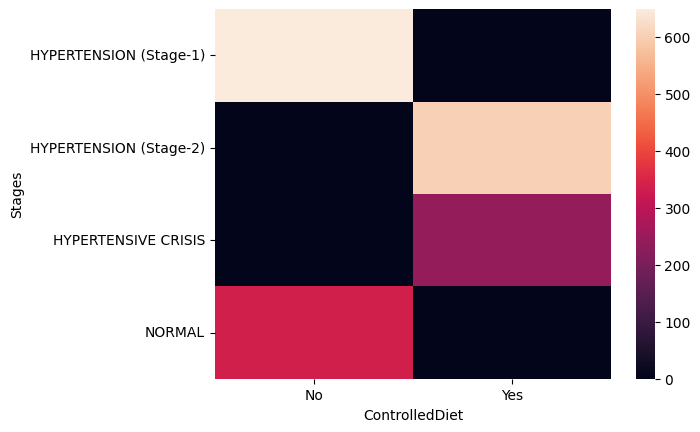

In [26]:
sns.heatmap(data=pd.crosstab(patient_df["Stages"], patient_df["ControlledDiet"]), cbar=True)
plt.show()

In [27]:
pd.crosstab(patient_df["Stages"], patient_df["Whendiagnosed"])

Whendiagnosed,1 - 5 Years,<1 Year,>5 Years
Stages,,,
HYPERTENSION (Stage-1),216,216,216
HYPERTENSION (Stage-2),184,232,184
HYPERTENSIVE CRISIS,80,81,80
NORMAL,96,96,144


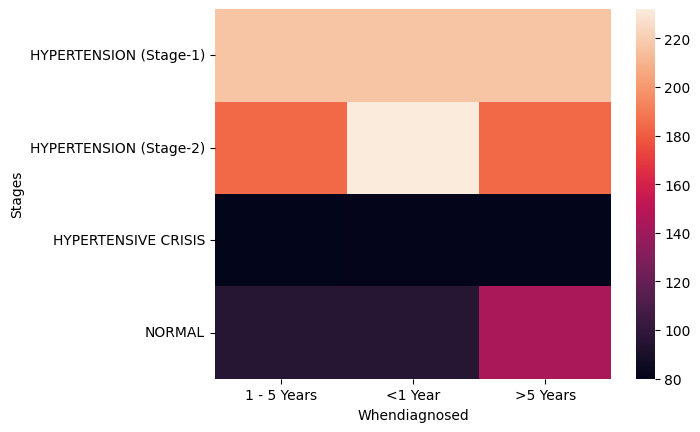

In [28]:
sns.heatmap(data=pd.crosstab(patient_df["Stages"], patient_df["Whendiagnosed"]), cbar=True)
plt.show()

### **Encoding categorical columns into numerical columns**

In [41]:
Columns = ['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity', 'BreathShortness', 'VisualChanges', 
           'NoseBleeding', 'Whendiagnosed', 'Systolic', 'Diastolic', 'ControlledDiet', 'Stages']
label_encoder = LabelEncoder()
for col in Columns:
    patient_df[col] = label_encoder.fit_transform(patient_df[col])
    print(label_encoder.classes_)

[0 1]
[0 1 2 3]
[0 1]
[0 1]
[0 1]
[0 1 2]
[0 1]
[0 1]
[0 1]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4]
[0 1]
[0 1 2 3]


In [30]:
patient_df.head(10)

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnosed,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,0,1,1,3,0,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0,0
5,0,2,1,0,0,0,0,0,0,1,1,3,0,0
6,1,3,1,0,0,0,0,0,0,1,1,3,0,0
7,0,3,1,0,0,0,0,0,0,1,1,3,0,0
8,1,0,1,0,0,2,0,0,0,1,1,3,0,0
9,1,1,1,1,1,2,1,1,0,1,2,4,1,1


#### **Multivariate Analysis**

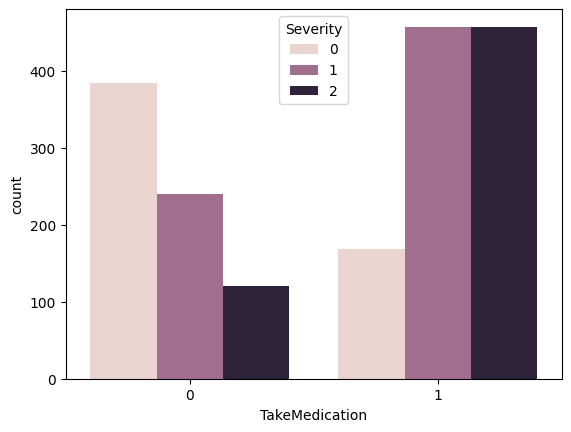

In [31]:
sns.countplot(data=patient_df, x='TakeMedication', hue='Severity')
plt.show()

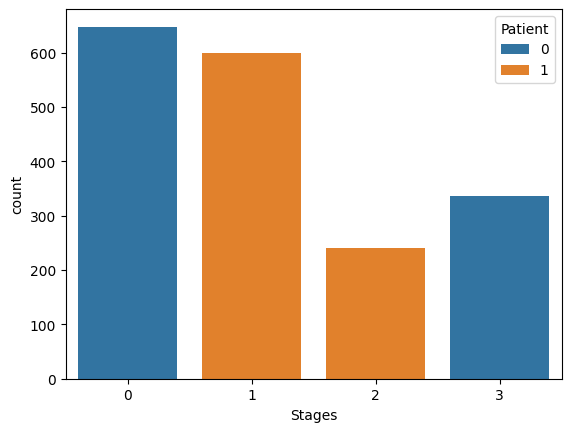

In [32]:
sns.countplot(data=patient_df, x='Stages', hue='Patient')
plt.show()

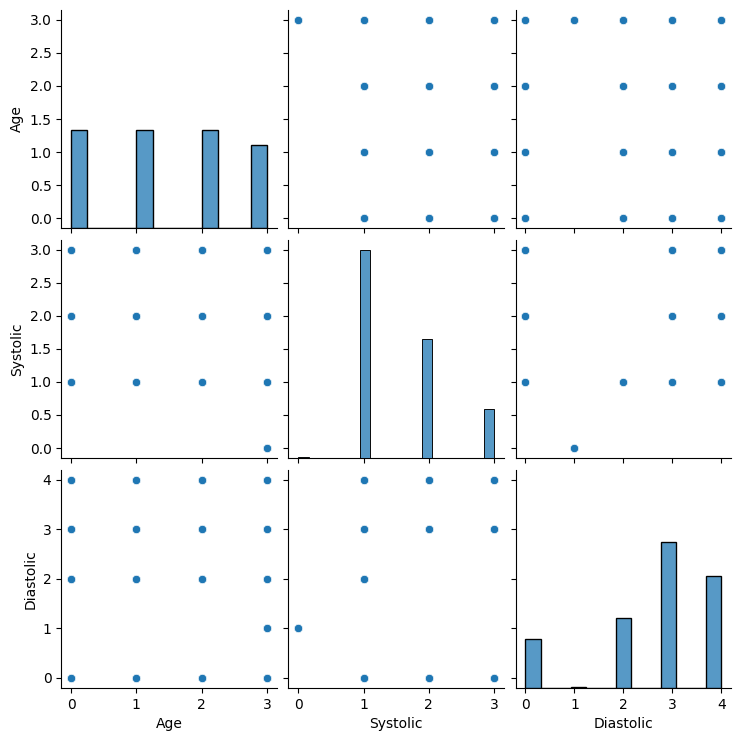

In [33]:
sns.pairplot(patient_df, x_vars=['Age', 'Systolic', 'Diastolic'], y_vars=['Age', 'Systolic', 'Diastolic'], palette='Set2')
plt.show()

### **Training the Model**
#### **Splitting Features and Labels from dataset**

In [34]:
X = patient_df.drop(columns=["Stages","History","TakeMedication"])
X

,Gender,Age,Patient,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnosed,Systolic,Diastolic,ControlledDiet
0,1,0,0,0,0,0,0,1,1,3,0
1,0,0,0,0,0,0,0,1,1,3,0
2,1,1,0,0,0,0,0,1,1,3,0
3,0,1,0,0,0,0,0,1,1,3,0
4,1,2,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,0,2,0,0,0,2,1,2,0
1821,1,2,0,2,0,0,0,2,1,2,0
1822,0,2,0,2,0,0,0,2,1,2,0
1823,1,3,0,2,0,0,0,2,1,2,0


In [35]:
Y = patient_df["Stages"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int32

#### **Splitting data into training and testing data**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

#### **Model Training**

In [37]:
log_reg = LogisticRegression()
ran_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()
nb = GaussianNB()
mnb = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=3)
sup_vec = svm.SVC(kernel='linear')

model_list = [log_reg, ran_for, dec_tree, nb, mnb, knn, sup_vec]
model_score = []

for model in model_list:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc_sc = accuracy_score(Y_test, Y_pred)
    model_score.append(acc_sc)
    cr_rep = classification_report(Y_test, Y_pred)

    print(model)
    print("Accuracy score: {0:.2f}%".format(acc_sc*100))
    print(f'''Classification report:
{cr_rep}''')

LogisticRegression()
Accuracy score: 98.01%
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       234
           1       1.00      0.99      0.99       202
           2       0.96      1.00      0.98        64
           3       0.92      1.00      0.96       103

    accuracy                           0.98       603
   macro avg       0.97      0.99      0.98       603
weighted avg       0.98      0.98      0.98       603

RandomForestClassifier()
Accuracy score: 100.00%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00       103

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00   

In [38]:
prediction = ran_for.predict([[3,1,1,0,2,2,0,2,0,1,0]])
if prediction == 0:
    print('Hypertension Stage-1')
elif prediction == 1:
    print('Hypertension Stage-2')
elif prediction == 2:
    print('Hypertensive Crisis')
elif prediction == 3:
    print('Normal')

Hypertension Stage-2


In [39]:
model_df = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'MultinomialNB', 'KNeighborsClassifier', 'Support Vector Machine'],
                        'Score': model_score})
model_df

,Model,Score
0,LogisticRegression,0.980100
1,RandomForestClassifier,1.000000
2,DecisionTreeClassifier,1.000000
3,GaussianNB,0.913765
4,MultinomialNB,0.797678
5,KNeighborsClassifier,0.993367
6,Support Vector Machine,0.978441


#### **Dumping the best model**

In [40]:
import pickle
pickle.dump(ran_for, open('model.pkl', 'wb'))